In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot

# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict
from model_helpers import plot_train_history


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()


,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [3]:
df_lab.Label = pd.Categorical(pd.factorize(df_lab.Label)[0])

In [4]:
df_lab.head()

,FilePath,Label
0,cats/cats_00072.jpg,0
1,cats/cats_00073.jpg,0
2,cats/cats_00074.jpg,0
3,cats/cats_00075.jpg,0
4,cats/cats_00076.jpg,0


In [5]:
df_lab.tail()

,FilePath,Label
2845,panda/panda_00996.jpg,2
2846,panda/panda_00997.jpg,2
2847,panda/panda_00998.jpg,2
2848,panda/panda_00999.jpg,2
2849,panda/panda_01000.jpg,2


In [6]:
df_lab.shape

(2850, 2)

In [7]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'

# # Set subfolders for train, val & test
# train_dir = os.path.join(data_dir, 'train/')
# val_dir = os.path.join(data_dir, 'valid/')
# test_dir = os.path.join(data_dir, 'test/')

In [8]:
# train test split
# Train & val


In [9]:
train_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

# test_loader = NEED HOLDOUT SET


loaders = {
    'train':train_loader,
    'valid':val_loader,
    #'test':test_loader,
}

In [10]:
# images, labels = next(iter(train_loader))

# # Display image and label
# plt.imshow(images[0].permute(1, 2, 0))
# print(labels[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


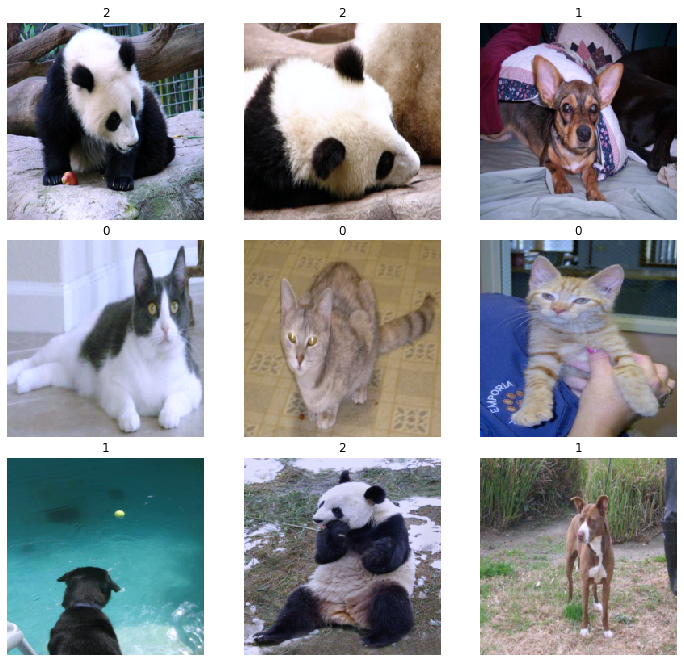

In [11]:
image_plot(train_loader)

### Create Model

In [12]:
# Model Parms

# Number Classes to predict
num_classes = 3

# Compute device (cuda = GPU)
device = 'cuda'

In [13]:
# create model from object

In [14]:
res_model = Resnet50_pretrained(num_classes)

In [15]:
# res_model = res_model.build()

### Train Model

In [16]:
# Train Params
n_epochs = 3
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [17]:
break

SyntaxError: 'break' outside loop (<ipython-input-17-6aaf1f276005>, line 4)

In [20]:
H = train(res_model.model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

Epoch #1, Batch #1 train_loss: 0.254034 train_acc: 1.0
Epoch #1, Batch #51 train_loss: 0.269210 train_acc: 0.971201
Epoch: 1 val_loss: 0.217720 val_acc: 0.937500
Epoch: 1 val_loss: 0.274674 val_acc: 0.973652
SAVE MODEL: val_loss decrease (0.217585) val_acc: 0.980702
Epoch #2, Batch #1 train_loss: 0.256326 train_acc: 0.96875
Epoch #2, Batch #51 train_loss: 0.225405 train_acc: 0.969975
Epoch: 2 val_loss: 0.195713 val_acc: 0.937500
Epoch: 2 val_loss: 0.223220 val_acc: 0.971814
SAVE MODEL: val_loss decrease (0.183091) val_acc: 0.979649
Epoch #3, Batch #1 train_loss: 0.237551 train_acc: 1.0
Epoch #3, Batch #51 train_loss: 0.196000 train_acc: 0.978554
Epoch: 3 val_loss: 0.189124 val_acc: 0.937500
Epoch: 3 val_loss: 0.195365 val_acc: 0.971814
SAVE MODEL: val_loss decrease (0.160358) val_acc: 0.980000


In [ ]:
# 

In [21]:
H

{'train_loss': [0.2660825252532959, 0.22616899013519287, 0.2034853994846344],
 'train_acc': [0.9729824561403508, 0.9694736842105263, 0.9775438596491228],
 'val_loss': [0.21758504211902618, 0.18309146165847778, 0.1603584736585617],
 'val_acc': [0.980701754385965, 0.9796491228070175, 0.98]}

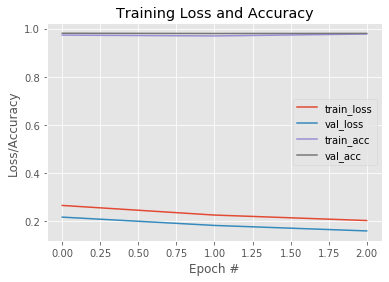

In [22]:
plot_train_history(H,n_epochs)

### Save Model

In [ ]:
# TODO Create model method

# save_model(model, 'test_save.pt')

### Load Model


In [ ]:
res_model2 = Resnet50_pretrained(num_classes)

In [ ]:
res_model2 = res_model2.build()

In [ ]:
# TODO Create model method

res_model2.load('test_save.pt',True)

### Train Logs

In [ ]:
### TODO make log function 

### Test Model

In [ ]:
# get images image folder
images = glob.glob("images/*")

In [ ]:
for image in images:
    predict(res_model,image,device)